<Axes: xlabel='x', ylabel='y'>

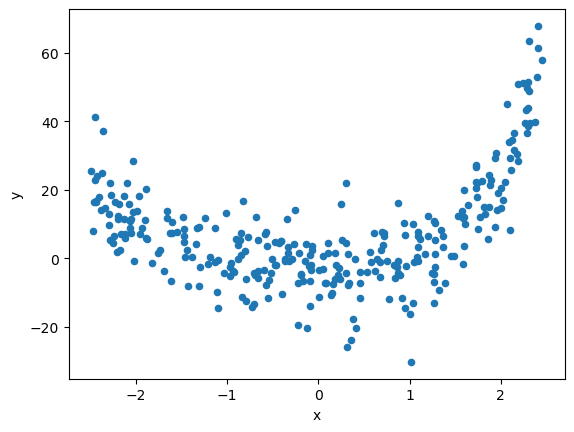

In [160]:
from sklearn import datasets
data_breast_cancer = datasets.load_breast_cancer(as_frame=True)
import numpy as np
import pandas as pd
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.plot.scatter(x='x',y='y')


## 3

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle
max_depth = 3
answer_list_3 = []
# load data
X_train, X_test, y_train, y_test = train_test_split(data_breast_cancer['data'][['mean texture', 'mean symmetry']], data_breast_cancer['target'], test_size=0.2)
tree_clf = DecisionTreeClassifier(max_depth=max_depth).fit(X_train, y_train)
y_train_pred, y_test_pred = tree_clf.predict(X_train), tree_clf.predict(X_test)

answer_list_3.append(tree_clf.get_depth())
answer_list_3.append(f1_score(y_train, y_train_pred))
answer_list_3.append(f1_score(y_test, y_test_pred))
answer_list_3.append(tree_clf.score(X_train, y_train))
answer_list_3.append(tree_clf.score(X_test, y_test))
# save to pickle
with open('f1acc_tree.pkl', 'wb') as f:
    pickle.dump(answer_list_3, f)
print(answer_list_3)



[3, 0.8391167192429022, 0.7746478873239436, 0.7758241758241758, 0.7192982456140351]


In [162]:
list_of_f1 = []
for depth in range(1,10):
    temp_tree = DecisionTreeClassifier(max_depth=depth).fit(X_train, y_train)
    y_train_pred, y_test_pred = temp_tree.predict(X_train), temp_tree.predict(X_test)
    f1_train, f1_test = f1_score(y_train, y_train_pred), f1_score(y_test, y_test_pred)
    list_of_f1.append((f1_test+f1_train)/2)
    
    print(f"depth: {depth}, f1_train: {f1_train}, f1_test: {f1_test}")
print(f"best depth: {np.argmax(list_of_f1)+1}")


depth: 1, f1_train: 0.7485380116959065, f1_test: 0.717948717948718
depth: 2, f1_train: 0.8268907563025211, f1_test: 0.7625899280575539
depth: 3, f1_train: 0.8391167192429022, f1_test: 0.7746478873239436
depth: 4, f1_train: 0.8484848484848485, f1_test: 0.7746478873239436
depth: 5, f1_train: 0.860759493670886, f1_test: 0.7777777777777778
depth: 6, f1_train: 0.8771929824561403, f1_test: 0.7837837837837839
depth: 7, f1_train: 0.8814691151919866, f1_test: 0.7857142857142858
depth: 8, f1_train: 0.9063032367972743, f1_test: 0.7194244604316548
depth: 9, f1_train: 0.9267461669505963, f1_test: 0.7338129496402879
best depth: 7


In [163]:
from sklearn.tree import export_graphviz
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(tree_clf, out_file=None, feature_names=['mean texture', 'mean symmetry'], class_names=['malignant', 'benign'], rounded=True, filled=True)
graph = graphviz.Source(dot_data)  

# save tree to png
with open('bc.png', 'wb') as f:
    f.write(graph.pipe(format='png'))
# graph


## 4

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1,1), y.reshape(-1,1), test_size=0.2)
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
y_train_pred_reg, y_test_pred_reg = tree_reg.predict(X_train), tree_reg.predict(X_test)
train_mse, test_mse = mean_squared_error( y_train, y_train_pred_reg), mean_squared_error(y_test, y_test_pred_reg)

answer_list_4 = []
answer_list_4.append(tree_reg.get_depth())
answer_list_4.append(train_mse)
answer_list_4.append(test_mse)

with open('mse_tree.pkl', 'wb') as f:
    pickle.dump(answer_list_4, f)
print(answer_list_4)


[3, 67.36151743836747, 69.90398032803432]


In [165]:
list_of_mse = []
for depth in range(1,10):
    tree_reg_temp = DecisionTreeRegressor(max_depth=depth, random_state=42).fit(X_train, y_train)
    y_train_pred_reg, y_test_pred_reg = tree_reg_temp.predict(X_train), tree_reg_temp.predict(X_test)
    train_mse, test_mse = mean_squared_error(y_train, y_train_pred_reg), mean_squared_error(y_test, y_test_pred_reg)
    list_of_mse.append((train_mse+test_mse)/2)
    
    print(f"depth: {depth}, train_mse: {train_mse}, test_mse: {test_mse}, combined_mse: {list_of_mse[-1]}")
print(f"best depth: {np.argmin(list_of_mse)+1}")

    

depth: 1, train_mse: 129.40999583216865, test_mse: 111.79180116584824, combined_mse: 120.60089849900845
depth: 2, train_mse: 98.89910151447647, test_mse: 102.68602294939608, combined_mse: 100.79256223193627
depth: 3, train_mse: 67.36151743836747, test_mse: 69.90398032803432, combined_mse: 68.63274888320089
depth: 4, train_mse: 58.40488114628135, test_mse: 64.64699689281498, combined_mse: 61.52593901954816
depth: 5, train_mse: 51.39579999208774, test_mse: 79.09056559592321, combined_mse: 65.24318279400548
depth: 6, train_mse: 47.39457499752466, test_mse: 92.40967115936755, combined_mse: 69.9021230784461
depth: 7, train_mse: 42.78777906932155, test_mse: 95.32047559201462, combined_mse: 69.05412733066808
depth: 8, train_mse: 37.23891190268338, test_mse: 94.25828902034804, combined_mse: 65.74860046151571
depth: 9, train_mse: 30.569898040844365, test_mse: 105.12959885539702, combined_mse: 67.84974844812069
best depth: 4


In [166]:
from sklearn.tree import export_graphviz
from sklearn import tree
import graphviz

dot_string = export_graphviz(tree_reg, out_file=None, rounded=True, filled=True)
graph = graphviz.Source(dot_string)

with open('reg.png', 'wb') as f:
    f.write(graph.pipe(format='png'))

In [167]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

# Train polynomial regression
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)
lin_reg_poly = LinearRegression().fit(X_train_poly, y_train)
lin_reg_poly_t = LinearRegression().fit(X_test_poly, y_test)

# Make predictions with polynomial regression
y_train_pred_poly = lin_reg_poly.predict(X_train_poly)
y_test_pred_poly = lin_reg_poly.predict(X_test_poly)


# Train KNN regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_train_pred_knn = knn.predict(X_train)
y_test_pred_knn = knn.predict(X_test)

# Plot data and predictions
# plt.plot(X_train, y_train_pred_poly, label='poly train')
# plt.plot(X_test, y_test_pred_poly, label='poly test')
# plt.plot(X_train, y_train_pred_knn, label='knn train')
# plt.plot(X_test, y_test_pred_knn, label='knn test')
# plt.legend()
# plt.show()